In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from chromalab.observer import Observer, Cone
from chromalab.spectra import Spectra, Illuminant
from chromalab.maxbasis import MaxBasis
from chromalab.maxdisplaybasis import MaxDisplayBasis
from chromalab.visualizer import PSWrapper, DisplayBasisType

objc[87771]: Class GLFWApplicationDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2ae252e28) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2d3f926f0). One of the two will be used. Which one is undefined.
objc[87771]: Class GLFWWindowDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2ae252db0) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2d3f92718). One of the two will be used. Which one is undefined.
objc[87771]: Class GLFWContentView is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2ae252e50) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [4]:
wavelengths = np.arange(400, 701, 5)
d65 = Illuminant.get("E")
trichromat = Observer.trichromat(wavelengths=wavelengths, illuminant=d65) 
maxbasis_tri = MaxBasis(trichromat, verbose=True)
viz = PSWrapper(trichromat, maxbasis_tri, itemsToDisplay=PSWrapper.ItemsToDisplay.BOTH, displayBasis=DisplayBasisType.MAXBASIS, verbose=True)

100%|██████████| 58/58 [00:00<00:00, 591.94it/s]
/Users/jessicalee/Projects/generalized-colorimetry/code/ChromaLab/chromalab/spectra.py:36: UserWarning: Data has values not between 0 and 1. Clipping.
  warnings.warn("Data has values not between 0 and 1. Clipping.")


[polyscope] Backend: openGL3_glfw -- Loaded openGL version: 4.1 Metal - 83.1


100%|██████████| 3660/3660 [00:08<00:00, 428.56it/s]


In [5]:
full_colors, full_rgbs = trichromat.get_full_colors_in_activations()

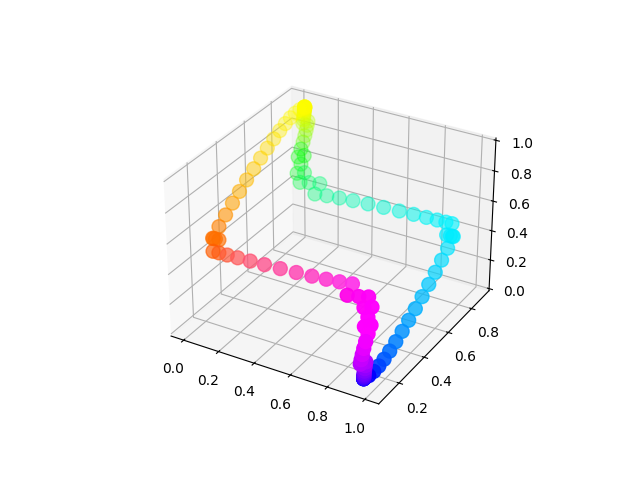

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(full_colors[:, 0], full_colors[:, 1], full_colors[:, 2], c=full_rgbs, s=100)
plt.show()